**The main objective of the Julia Notebook is to find the top 07 teams in two different leagues and generate a merged data frame to determine how much each football team has spent on one league and one fantasy point.**

In [229]:
#Loading two CSV files(Which were scraped using R)

using CSV
using DataFrames

LaLigaTables = CSV.read("LaLigaTables.csv", DataFrame)
PremierLeagueTables = CSV.read("PremierLeagueTables.csv", DataFrame)

Row,Column1,Season_ID,Season,League,Rk,Team_ID,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts.MP,Attendance,Player_ID,Top.Team.Scorer,GoalsScored,Goalkeeper,Notes,xG,xGA,xGD,xGD.90
,Int64,String15,String15,String15,Int64,String31,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Int64,String,String,Int64,String31,String?,String7,String7,String7,String7
1,1,09/10-PL,2009-2010,Premier League,1,09/10-Chelsea,Chelsea,38,27,5,6,103,32,71,86,2.26,41423,09/10-Didier Drogba,Didier Drogba,29,Petr Čech,→ Champions League via league finish,NA,NA,NA,NA
2,2,09/10-PL,2009-2010,Premier League,2,09/10-Manchester Utd,Manchester Utd,38,27,4,7,86,28,58,85,2.24,74864,09/10-Wayne Rooney,Wayne Rooney,26,Edwin van der Sar,→ Champions League via league finish,NA,NA,NA,NA
3,3,09/10-PL,2009-2010,Premier League,3,09/10-Arsenal,Arsenal,38,23,6,9,83,41,42,75,1.97,59927,09/10-Cesc Fàbregas,Cesc Fàbregas,15,Manuel Almunia,→ Champions League via league finish,NA,NA,NA,NA
4,4,09/10-PL,2009-2010,Premier League,4,09/10-Tottenham,Tottenham,38,21,7,10,67,41,26,70,1.84,35794,09/10-Jermain Defoe,Jermain Defoe,18,Heurelho Gomes,→ Champions League via league finish,NA,NA,NA,NA
5,5,09/10-PL,2009-2010,Premier League,5,09/10-Manchester City,Manchester City,38,18,13,7,73,45,28,67,1.76,45470,09/10-Carlos Tevez,Carlos Tevez,23,Shay Given,→ Europa League via league finish,NA,NA,NA,NA
6,6,09/10-PL,2009-2010,Premier League,6,09/10-Aston Villa,Aston Villa,38,17,13,8,52,39,13,64,1.68,38573,09/10-Gabriel Agbonlahor,Gabriel Agbonlahor,13,Brad Friedel,→ Europa League via league finish 1,NA,NA,NA,NA
7,7,09/10-PL,2009-2010,Premier League,7,09/10-Liverpool,Liverpool,38,18,9,11,61,35,26,63,1.66,42864,09/10-Fernando Torres,Fernando Torres,18,Pepe Reina,→ Europa League via league finish 2,NA,NA,NA,NA
8,8,09/10-PL,2009-2010,Premier League,8,09/10-Everton,Everton,38,16,13,9,60,49,11,61,1.61,36725,09/10-Louis Saha,Louis Saha,13,Tim Howard,missing,NA,NA,NA,NA
9,9,09/10-PL,2009-2010,Premier League,9,09/10-Birmingham City,Birmingham City,38,13,11,14,38,47,-9,50,1.32,25246,09/10-Cameron Jerome,Cameron Jerome,10,Joe Hart,missing,NA,NA,NA,NA


In [230]:
LaLigaTables

Row,Column1,Season_ID,Season,League,Rk,Team_ID,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts.MP,Attendance,Player_ID,Top.Team.Scorer,GoalsScored,Goalkeeper,Notes,xG,xGA,xGD,xGD.90
,Int64,String15,String15,String7,Int64,String31,String31,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,String7,String,String,Int64,String31,String,String7,String7,String7,String7
1,1,09/10-LL,2009-2010,La Liga,1,09/10-Barcelona,Barcelona,38,31,6,1,98,24,74,99,2.61,77106,09/10-Lionel Messi,Lionel Messi,34,Víctor Valdés,→ Champions League via league finish,NA,NA,NA,NA
2,2,09/10-LL,2009-2010,La Liga,2,09/10-Real Madrid,Real Madrid,38,31,3,4,102,35,67,96,2.53,74316,09/10-Gonzalo Higuaín,Gonzalo Higuaín,27,Iker Casillas,→ Champions League via league finish,NA,NA,NA,NA
3,3,09/10-LL,2009-2010,La Liga,3,09/10-Valencia,Valencia,38,21,8,9,59,40,19,71,1.87,41221,09/10-David Villa,David Villa,21,César Sánchez,→ Champions League via league finish,NA,NA,NA,NA
4,4,09/10-LL,2009-2010,La Liga,4,09/10-Sevilla,Sevilla,38,19,6,13,65,49,16,63,1.66,38597,09/10-Luís Fabiano,Luís Fabiano,15,Andrés Palop,→ Champions League via league finish,NA,NA,NA,NA
5,5,09/10-LL,2009-2010,La Liga,5,09/10-Mallorca,Mallorca,38,18,8,12,59,44,15,62,1.63,13209,09/10-Aritz Aduriz,Aritz Aduriz,12,Dudu Aouate,,NA,NA,NA,NA
6,6,09/10-LL,2009-2010,La Liga,6,09/10-Getafe,Getafe,38,17,7,14,58,48,10,58,1.53,10863,09/10-Roberto Soldado,Roberto Soldado,16,Jordi Codina,→ Europa League via league finish,NA,NA,NA,NA
7,7,09/10-LL,2009-2010,La Liga,7,09/10-Villarreal,Villarreal,38,16,8,14,58,57,1,56,1.47,17089,09/10-Nilmar,Nilmar,11,Diego López,→ Europa League via league finish 1,NA,NA,NA,NA
8,8,09/10-LL,2009-2010,La Liga,8,09/10-Athletic Club,Athletic Club,38,15,9,14,50,53,-3,54,1.42,36079,09/10-Fernando Llorente,Fernando Llorente,14,Gorka Iraizoz,,NA,NA,NA,NA
9,9,09/10-LL,2009-2010,La Liga,9,09/10-Atlético Madrid,Atlético Madrid,38,13,8,17,57,61,-4,47,1.24,40324,09/10-Diego Forlán,Diego Forlán,18,David de Gea,→ Europa League via Europa League win,NA,NA,NA,NA


In [231]:
#Joining Data

League_Data = innerjoin(LaLigaTables, PremierLeagueTables , on = :Column1	, makeunique=true)

Row,Column1,Season_ID,Season,League,Rk,Team_ID,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts.MP,Attendance,Player_ID,Top.Team.Scorer,GoalsScored,Goalkeeper,Notes,xG,xGA,xGD,xGD.90,Season_ID_1,Season_1,League_1,Rk_1,Team_ID_1,Squad_1,MP_1,W_1,D_1,L_1,GF_1,GA_1,GD_1,Pts_1,Pts.MP_1,Attendance_1,Player_ID_1,Top.Team.Scorer_1,GoalsScored_1,Goalkeeper_1,Notes_1,xG_1,xGA_1,xGD_1,xGD.90_1
,Int64,String15,String15,String7,Int64,String31,String31,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,String7,String,String,Int64,String31,String,String7,String7,String7,String7,String15,String15,String15,Int64,String31,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Int64,String,String,Int64,String31,String?,String7,String7,String7,String7
1,1,09/10-LL,2009-2010,La Liga,1,09/10-Barcelona,Barcelona,38,31,6,1,98,24,74,99,2.61,77106,09/10-Lionel Messi,Lionel Messi,34,Víctor Valdés,→ Champions League via league finish,NA,NA,NA,NA,09/10-PL,2009-2010,Premier League,1,09/10-Chelsea,Chelsea,38,27,5,6,103,32,71,86,2.26,41423,09/10-Didier Drogba,Didier Drogba,29,Petr Čech,→ Champions League via league finish,NA,NA,NA,NA
2,2,09/10-LL,2009-2010,La Liga,2,09/10-Real Madrid,Real Madrid,38,31,3,4,102,35,67,96,2.53,74316,09/10-Gonzalo Higuaín,Gonzalo Higuaín,27,Iker Casillas,→ Champions League via league finish,NA,NA,NA,NA,09/10-PL,2009-2010,Premier League,2,09/10-Manchester Utd,Manchester Utd,38,27,4,7,86,28,58,85,2.24,74864,09/10-Wayne Rooney,Wayne Rooney,26,Edwin van der Sar,→ Champions League via league finish,NA,NA,NA,NA
3,3,09/10-LL,2009-2010,La Liga,3,09/10-Valencia,Valencia,38,21,8,9,59,40,19,71,1.87,41221,09/10-David Villa,David Villa,21,César Sánchez,→ Champions League via league finish,NA,NA,NA,NA,09/10-PL,2009-2010,Premier League,3,09/10-Arsenal,Arsenal,38,23,6,9,83,41,42,75,1.97,59927,09/10-Cesc Fàbregas,Cesc Fàbregas,15,Manuel Almunia,→ Champions League via league finish,NA,NA,NA,NA
4,4,09/10-LL,2009-2010,La Liga,4,09/10-Sevilla,Sevilla,38,19,6,13,65,49,16,63,1.66,38597,09/10-Luís Fabiano,Luís Fabiano,15,Andrés Palop,→ Champions League via league finish,NA,NA,NA,NA,09/10-PL,2009-2010,Premier League,4,09/10-Tottenham,Tottenham,38,21,7,10,67,41,26,70,1.84,35794,09/10-Jermain Defoe,Jermain Defoe,18,Heurelho Gomes,→ Champions League via league finish,NA,NA,NA,NA
5,5,09/10-LL,2009-2010,La Liga,5,09/10-Mallorca,Mallorca,38,18,8,12,59,44,15,62,1.63,13209,09/10-Aritz Aduriz,Aritz Aduriz,12,Dudu Aouate,,NA,NA,NA,NA,09/10-PL,2009-2010,Premier League,5,09/10-Manchester City,Manchester City,38,18,13,7,73,45,28,67,1.76,45470,09/10-Carlos Tevez,Carlos Tevez,23,Shay Given,→ Europa League via league finish,NA,NA,NA,NA
6,6,09/10-LL,2009-2010,La Liga,6,09/10-Getafe,Getafe,38,17,7,14,58,48,10,58,1.53,10863,09/10-Roberto Soldado,Roberto Soldado,16,Jordi Codina,→ Europa League via league finish,NA,NA,NA,NA,09/10-PL,2009-2010,Premier League,6,09/10-Aston Villa,Aston Villa,38,17,13,8,52,39,13,64,1.68,38573,09/10-Gabriel Agbonlahor,Gabriel Agbonlahor,13,Brad Friedel,→ Europa League via league finish 1,NA,NA,NA,NA
7,7,09/10-LL,2009-2010,La Liga,7,09/10-Villarreal,Villarreal,38,16,8,14,58,57,1,56,1.47,17089,09/10-Nilmar,Nilmar,11,Diego López,→ Europa League via league finish 1,NA,NA,NA,NA,09/10-PL,2009-2010,Premier League,7,09/10-Liverpool,Liverpool,38,18,9,11,61,35,26,63,1.66,42864,09/10-Fernando Torres,Fernando Torres,18,Pepe Reina,→ Europa League via league finish 2,NA,NA,NA,NA
8,8,09/10-LL,2009-2010,La Liga,8,09/10-Athletic Club,Athletic Club,38,15,9,14,50,53,-3,54,1.42,36079,09/10-Fernando Llorente,Fernando Llorente,14,Gorka Iraizoz,,NA,NA,NA,NA,09/10-PL,2009-2010,Premier League,8,09/10-Everton,Everton,38,16,13,9,60,49,11,61,1.61,36725,09/10-Louis Saha,Louis Saha,13,Tim Howard,missing,NA,NA,NA,NA
9,9,09/10-LL,2009-2010,La Liga,9,09/10-Atlético Madrid,Atlético Madrid,38,13,8,17,57,61,-4,47,1.24,40324,09/10-Diego Forlán,Diego Forlán,18,David de Gea,→ Europa League via Europa League win,NA,NA,NA,NA,09/10-PL,2009-2010,Premier League,9,09/10-Birmingham City,Birmi

In [232]:
#Filtering Desired Columns
League_Data_Goals = League_Data[:,[:Season,:Squad,:GF,:GA,:Pts,:Squad_1,:GF_1,:GA_1,:Pts_1 ]]

Row,Season,Squad,GF,GA,Pts,Squad_1,GF_1,GA_1,Pts_1
,String15,String31,Int64,Int64,Int64,String15,Int64,Int64,Int64
1,2009-2010,Barcelona,98,24,99,Chelsea,103,32,86
2,2009-2010,Real Madrid,102,35,96,Manchester Utd,86,28,85
3,2009-2010,Valencia,59,40,71,Arsenal,83,41,75
4,2009-2010,Sevilla,65,49,63,Tottenham,67,41,70
5,2009-2010,Mallorca,59,44,62,Manchester City,73,45,67
6,2009-2010,Getafe,58,48,58,Aston Villa,52,39,64
7,2009-2010,Villarreal,58,57,56,Liverpool,61,35,63
8,2009-2010,Athletic Club,50,53,54,Everton,60,49,61
9,2009-2010,Atlético Madrid,57,61,47,Birmingham City,38,47,50


In [233]:
#Looking for missing values

League_Data_Goals = dropmissing(League_Data_Goals, disallowmissing=true)

Row,Season,Squad,GF,GA,Pts,Squad_1,GF_1,GA_1,Pts_1
,String15,String31,Int64,Int64,Int64,String15,Int64,Int64,Int64
1,2009-2010,Barcelona,98,24,99,Chelsea,103,32,86
2,2009-2010,Real Madrid,102,35,96,Manchester Utd,86,28,85
3,2009-2010,Valencia,59,40,71,Arsenal,83,41,75
4,2009-2010,Sevilla,65,49,63,Tottenham,67,41,70
5,2009-2010,Mallorca,59,44,62,Manchester City,73,45,67
6,2009-2010,Getafe,58,48,58,Aston Villa,52,39,64
7,2009-2010,Villarreal,58,57,56,Liverpool,61,35,63
8,2009-2010,Athletic Club,50,53,54,Everton,60,49,61
9,2009-2010,Atlético Madrid,57,61,47,Birmingham City,38,47,50


In [234]:
#Filtering data from 2015 to 2022

League_Data_Goals_2015_2022 = League_Data_Goals[121:260,:] 

Row,Season,Squad,GF,GA,Pts,Squad_1,GF_1,GA_1,Pts_1
,String15,String31,Int64,Int64,Int64,String15,Int64,Int64,Int64
1,2015-2016,Barcelona,112,29,91,Leicester City,68,36,81
2,2015-2016,Real Madrid,110,34,90,Arsenal,65,36,71
3,2015-2016,Atlético Madrid,63,18,88,Tottenham,69,35,70
4,2015-2016,Villarreal,44,35,64,Manchester City,71,41,66
5,2015-2016,Athletic Club,58,45,62,Manchester Utd,49,35,66
6,2015-2016,Celta Vigo,51,59,60,Southampton,59,41,63
7,2015-2016,Sevilla,51,50,52,West Ham,65,51,62
8,2015-2016,Málaga,38,35,48,Liverpool,63,50,60
9,2015-2016,Real Sociedad,45,48,48,Stoke City,41,55,51


In [235]:
#Calculating the Sum of Goals For, Goals Against and Points during the period of 2015 to 2022 in Laliga

Laliga_Goals = combine(groupby(League_Data_Goals_2015_2022, :Squad), :GF => sum, :GA => sum, :Pts => sum )

Row,Squad,GF_sum,GA_sum,Pts_sum
,String31,Int64,Int64,Int64
1,Barcelona,656,245,595
2,Real Madrid,590,249,584
3,Valencia,362,345,368
4,Sevilla,391,301,458
5,Mallorca,76,128,72
6,Getafe,231,256,281
7,Villarreal,392,300,413
8,Athletic Club,323,298,373
9,Atlético Madrid,429,191,548


In [236]:
#Sorting data according to the accumulated points between the period of 2015 to 2022
Laliga_Points_sort = sort!(Laliga_Goals, :Pts_sum, rev=true)

Row,Squad,GF_sum,GA_sum,Pts_sum
,String31,Int64,Int64,Int64
1,Barcelona,656,245,595
2,Real Madrid,590,249,584
3,Atlético Madrid,429,191,548
4,Sevilla,391,301,458
5,Villarreal,392,300,413
6,Real Sociedad,370,329,391
7,Athletic Club,323,298,373
8,Valencia,362,345,368
9,Betis,339,379,361


In [237]:
#Calculating the Sum of Goals For, Goals Against and Points during the period of 2015 to 2022 in Premier League

PL_Goals = combine(groupby(League_Data_Goals_2015_2022, :Squad_1), :GF_1 => sum, :GA_1 => sum ,:Pts_1 => sum )

Row,Squad_1,GF_1_sum,GA_1_sum,Pts_1_sum
,String15,Int64,Int64,Int64
1,Chelsea,472,286,492
2,Manchester Utd,432,283,480
3,Arsenal,461,317,465
4,Tottenham,494,268,496
5,Manchester City,636,223,602
6,Aston Villa,175,243,152
7,Liverpool,561,253,568
8,Everton,353,373,358
9,Stoke City,117,179,128


In [238]:
#Sorting data according to the accumulated points between the period of 2015 to 2022
PL_Points_sort = sort!(PL_Goals, :Pts_1_sum, rev=true)

Row,Squad_1,GF_1_sum,GA_1_sum,Pts_1_sum
,String15,Int64,Int64,Int64
1,Manchester City,636,223,602
2,Liverpool,561,253,568
3,Tottenham,494,268,496
4,Chelsea,472,286,492
5,Manchester Utd,432,283,480
6,Arsenal,461,317,465
7,Leicester City,420,357,404
8,West Ham,383,398,361
9,Everton,353,373,358


In [239]:
#importing packages
using Statistics, DataFrames, Query, VegaDatasets, VegaLite

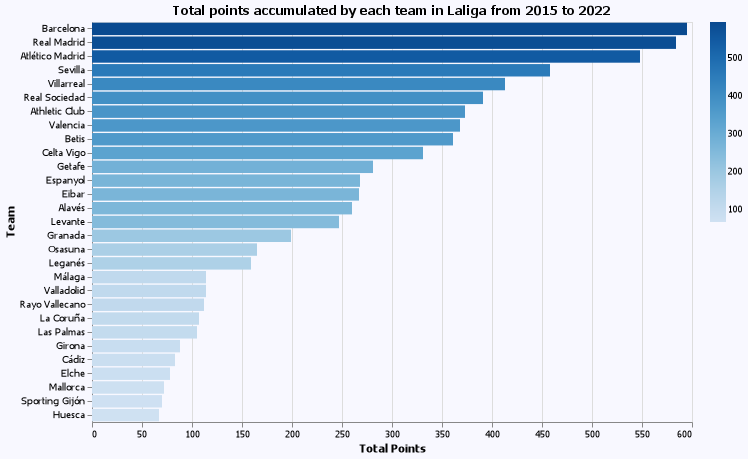

In [240]:
#plotting the data for Laliga
Laliga_Points_sort |>
    @vlplot(width = 600, height = 400,
        title = "Total points accumulated by each team in Laliga from 2015 to 2022",
        :bar,
        x = {:Pts_sum, title = "Total Points"},
        y = {:Squad,sort = "-x" , title = "Team"},
        color = :Pts_sum,
        config = {background = "ghostwhite",legend={title = nothing}}
    )

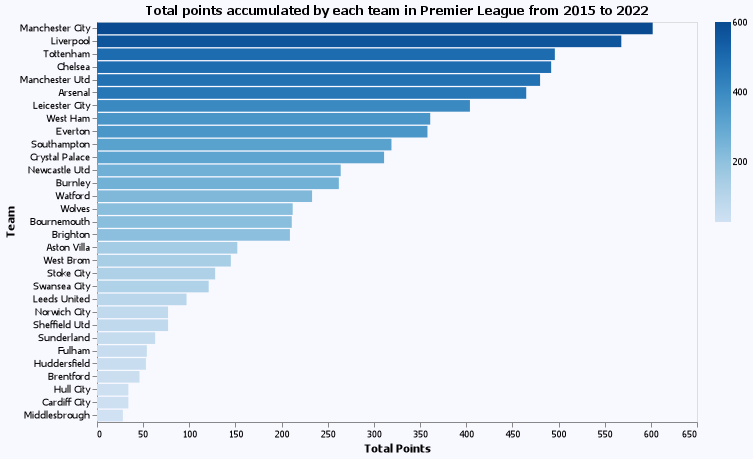

In [241]:
#plotting the data for Premier League
PL_Points_sort |>
    @vlplot(width = 600, height = 400,
        title = "Total points accumulated by each team in Premier League from 2015 to 2022",
        :bar,
        x = {:Pts_1_sum, title = "Total Points"},
        y = {:Squad_1, sort = "-x" , title = "Team"},
        color = :Pts_1_sum,
        config = {background = "ghostwhite",legend={title = nothing},axis={grid=false}}
    )

In [242]:
#Filtering top 7 teams for Laliga
Laliga_Points_sort_Top7 = Laliga_Points_sort[1:7,:]

Row,Squad,GF_sum,GA_sum,Pts_sum
,String31,Int64,Int64,Int64
1,Barcelona,656,245,595
2,Real Madrid,590,249,584
3,Atlético Madrid,429,191,548
4,Sevilla,391,301,458
5,Villarreal,392,300,413
6,Real Sociedad,370,329,391
7,Athletic Club,323,298,373


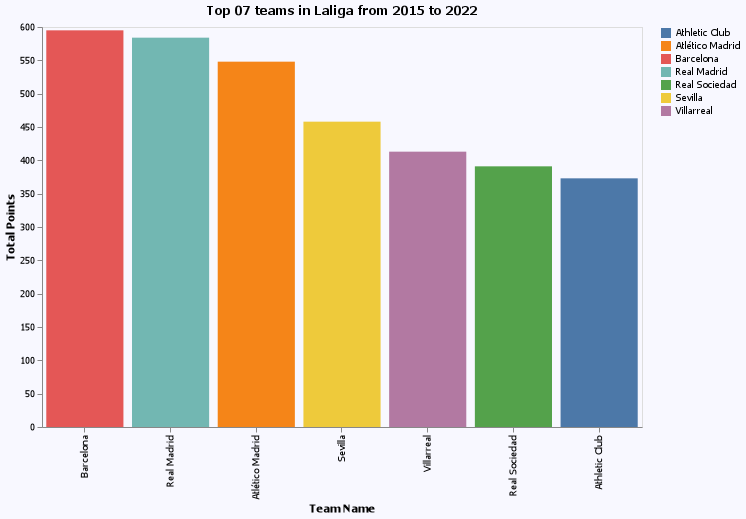

In [243]:
#Plotting data for top 07 Laliga Teams 

Laliga_Points_sort_Top7  |>
    @vlplot(width = 600, height = 400,
        title = "Top 07 teams in Laliga from 2015 to 2022",
        :bar,
        x = {:Squad,sort = "-y" , title = "Team Name"},
        y = {:Pts_sum, title = "Total Points"},
        color = :Squad,
        config = {background = "ghostwhite",legend={title = nothing},axis={grid=false}}
    )

In [245]:
#Filtering top 7 teams for Premier league
PL_Points_sort_Top7 = PL_Points_sort[1:7,:]

Row,Squad_1,GF_1_sum,GA_1_sum,Pts_1_sum
,String15,Int64,Int64,Int64
1,Manchester City,636,223,602
2,Liverpool,561,253,568
3,Tottenham,494,268,496
4,Chelsea,472,286,492
5,Manchester Utd,432,283,480
6,Arsenal,461,317,465
7,Leicester City,420,357,404


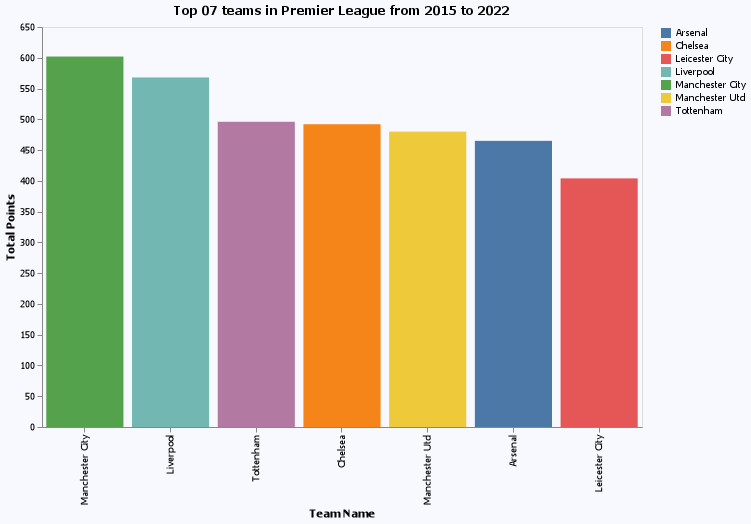

In [246]:
#Plotting data for top 07 Laliga Teams 

PL_Points_sort_Top7  |>
    @vlplot(width = 600, height = 400,
        title = "Top 07 teams in Premier League from 2015 to 2022",
        :bar,
        x = {:Squad_1,sort = "-7" , title = "Team Name"},
        y = {:Pts_1_sum, title = "Total Points"},
        color = :Squad_1,
        config = {background = "ghostwhite",legend={title = nothing},axis={grid=false}}
    )

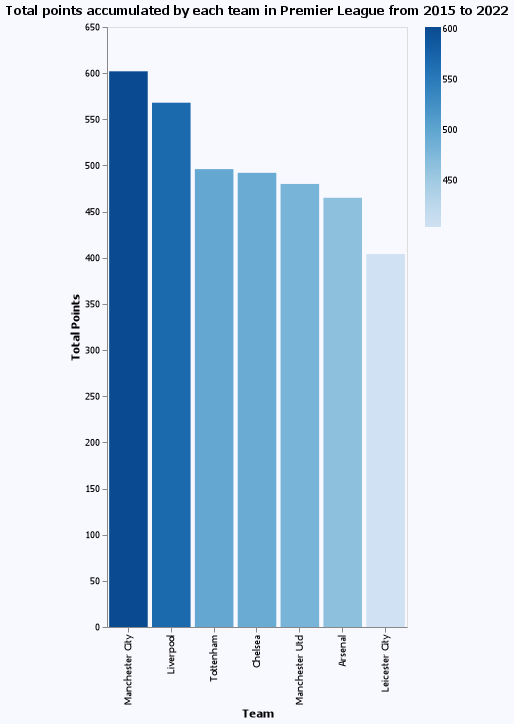

In [180]:
#Plotting data for top 07 Premier League Teams 

PL_Points_sort_Top7  |>
    @vlplot(width = 300, height = 600,
        title = "Total points accumulated by each team in Premier League from 2015 to 2022",
        :bar,
        x = {:Squad_1, sort = "-y" , title = "Team"},
        y = {:Pts_1_sum, title = "Total Points"},
        color = :Pts_1_sum,
        config = {background = "ghostwhite", legend={title = nothing}, axis={grid=false}}
    )

In [181]:
#Combinig both data frames

Combined_DF = hcat(PL_Points_sort_Top7, Laliga_Points_sort_Top7)

Row,Squad_1,GF_1_sum,GA_1_sum,Pts_1_sum,Squad,GF_sum,GA_sum,Pts_sum
,String15,Int64,Int64,Int64,String31,Int64,Int64,Int64
1,Manchester City,636,223,602,Barcelona,656,245,595
2,Liverpool,561,253,568,Real Madrid,590,249,584
3,Tottenham,494,268,496,Atlético Madrid,429,191,548
4,Chelsea,472,286,492,Sevilla,391,301,458
5,Manchester Utd,432,283,480,Villarreal,392,300,413
6,Arsenal,461,317,465,Real Sociedad,370,329,391
7,Leicester City,420,357,404,Athletic Club,323,298,373


In [182]:
# loading CSV files for Fantasy Point Data

LaLigaFantasy = CSV.read("LaLigaFantasy.csv", DataFrame)
PremierLeagueFantasy = CSV.read("PremierLeagueFantasy.csv", DataFrame)

Row,Column1,Season_ID,Season,League,Player_ID,Players,Points,Clubs,Position,Start,Goals,A,CS,CS.part,Yellow,Red,Sub,CO,Off,Pen.SV,Pen.M,Goals.conceded,Conceded.1.,OG
,Int64,String15,String15,String15,String,String31,String3,String7,String15,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3
1,1,22/23-PL,2022/2023,Premier League,22/23-Erling Haaland,Erling Haaland,267,MCFC,Forward,33,36,8,-,-,5,0,3,2,12,-,0,-,-,0
2,2,22/23-PL,2022/2023,Premier League,22/23-Harry Kane,Harry Kane,227,SPURS,Forward,38,30,3,-,-,6,0,0,0,3,-,1,-,-,0
3,3,22/23-PL,2022/2023,Premier League,22/23-Mohamed Salah,Mohamed Salah,200,LPOOL,Forward,37,19,12,-,-,2,0,1,1,8,-,2,-,-,0
4,4,22/23-PL,2022/2023,Premier League,22/23-Bukayo Saka,Bukayo Saka,170,ARSL,Midfielder,37,14,11,-,-,6,0,1,1,14,-,1,-,-,0
5,5,22/23-PL,2022/2023,Premier League,22/23-Ivan Toney,Ivan Toney,167,BREN,Forward,33,20,4,-,-,9,0,0,0,4,-,1,-,-,0
6,6,22/23-PL,2022/2023,Premier League,22/23-Martin Odegaard,Martin Odegaard,166,ARSL,Midfielder,37,15,7,-,-,4,0,0,0,23,-,0,-,-,0
7,7,22/23-PL,2022/2023,Premier League,22/23-Marcus Rashford,Marcus Rashford,165,MUFC,Forward,32,17,5,-,-,2,0,3,3,13,-,0,-,-,0
8,8,22/23-PL,2022/2023,Premier League,22/23-Ollie Watkins,Ollie Watkins,160,AVILLA,Forward,36,15,6,-,-,4,0,1,1,10,-,1,-,-,0
9,9,22/23-PL,2022/2023,Premier League,22/23-Gabriel Martinelli,Gabriel Martinelli,157,ARSL,Midfielder,34,15,5,-,-,3,0,2,2,18,-,0,-,-,0


In [183]:
#Filtering data from 2015 to 2022 for laliga fantacy points
LaLigaFantasy_2015_2022 = LaLigaFantasy[1:5240,:] 

Row,Column1,Season_ID,Season,League,Player_ID,Players,Points,Clubs,Position,Start,Goals,A,CS,CS.part,Yellow,Red,Sub,CO,Off,Pen.SV,Pen.M,Goals.conceded,Conceded.1.,OG
,Int64,String15,String15,String7,String,String31,Int64,String7,String15,Int64,Int64,Int64,String3,String3,Int64,Int64,Int64,Int64,Int64,String1,Int64,String3,String3,Int64
1,1,22/23-LL,2022/2023,La Liga,22/23-Robert Lewandowski,Robert Lewandowski,198,BARC,Forward,33,23,7,-,-,3,0,1,1,5,-,1,-,-,0
2,2,22/23-LL,2022/2023,La Liga,22/23-Antoine Griezmann,Antoine Griezmann,190,,Forward,31,15,16,-,-,2,0,7,7,8,-,0,-,-,0
3,3,22/23-LL,2022/2023,La Liga,22/23-Marc-Andre ter Stegen,Marc-Andre ter Stegen,172,BARC,Goalkeeper,38,0,0,26,0,0,0,0,0,2,0,0,20,8,0
4,4,22/23-LL,2022/2023,La Liga,22/23-Borja Iglesias,Borja Iglesias,158,BETI,Defender,29,15,3,1,12,2,1,6,6,22,-,1,33,11,0
5,5,22/23-LL,2022/2023,La Liga,22/23-Joselu,Joselu,151,RCDE,Forward,33,16,2,-,-,2,0,2,1,0,-,0,-,-,0
6,6,22/23-LL,2022/2023,La Liga,22/23-Alejandro Balde,Alejandro Balde,149,BARC,Defender,30,1,6,14,9,4,0,7,3,9,-,0,17,7,0
7,7,22/23-LL,2022/2023,La Liga,22/23-Karim Benzema,Karim Benzema,147,MADR,Forward,24,19,3,-,-,1,0,0,0,6,-,2,-,-,0
8,8,22/23-LL,2022/2023,La Liga,22/23-Vedat Muriqi,Vedat Muriqi,142,MALL,Forward,34,15,3,-,-,6,1,1,1,17,-,1,-,-,0
9,9,22/23-LL,2022/2023,La Liga,22/23-Enes Unal,Enes Unal,141,,Forward,35,14,3,-,-,6,0,0,0,16,-,1,-,-,0


In [184]:
#Group By the Teams and get the accumulated fantacy points

LL_Fantasy_Points_2015_2022 = combine(groupby(LaLigaFantasy_2015_2022, :Clubs), :Points => sum)

Row,Clubs,Points_sum
,String7,Int64
1,BARC,14298
2,,61724
3,BETI,10312
4,RCDE,8074
5,MADR,13490
6,MALL,3446
7,RCCV,10082
8,RESO,11153
9,ATBI,10554


In [185]:
#Sort according to the accumulated fantacy points

LL_Fantasy_Points_2015_2022_Sort = sort!(LL_Fantasy_Points_2015_2022, :Points_sum, rev=true)

Row,Clubs,Points_sum
,String7,Int64
1,,61724
2,BARC,14298
3,MADR,13490
4,SEVI,11481
5,VIAL,11371
6,RESO,11153
7,ATBI,10554
8,BETI,10312
9,VALA,10286


In [186]:
#Changing the string type of Clubs column

LL_Fantasy_Points_2015_2022_Sort_1 = LL_Fantasy_Points_2015_2022_Sort |> @map({Clubs = String(_.Clubs),_.Points_sum}) |> DataFrame

Row,Clubs,Points_sum
,String,Int64
1,,61724
2,BARC,14298
3,MADR,13490
4,SEVI,11481
5,VIAL,11371
6,RESO,11153
7,ATBI,10554
8,BETI,10312
9,VALA,10286


In [187]:
#Replacing all the abbreviations with actual team names

LL_Fantasy_Points_2015_2022_Sort_1.Clubs = replace!(LL_Fantasy_Points_2015_2022_Sort_1.Clubs, "BARC" => "Barcelona","MADR" => "Real Madrid","SEVI" => "Sevilla","VIAL" => "Villarreal","RESO" => "Real Sociedad","ATBI" => "Athletic Club","BETI" => "Atlético Madrid")

19-element Vector{String}:
 ""
 "Barcelona"
 "Real Madrid"
 "Sevilla"
 "Villarreal"
 "Real Sociedad"
 "Athletic Club"
 "Atlético Madrid"
 "VALA"
 "RCCV"
 "RCDE"
 "DEAL"
 "OSAS"
 "RAVA"
 "VALL"
 "MALL"
 "MALA"
 "LASP"
 "RCDC"

In [188]:
LL_Fantasy_Points_2015_2022_Sort_1

Row,Clubs,Points_sum
,String,Int64
1,,61724
2,Barcelona,14298
3,Real Madrid,13490
4,Sevilla,11481
5,Villarreal,11371
6,Real Sociedad,11153
7,Athletic Club,10554
8,Atlético Madrid,10312
9,VALA,10286


In [189]:
#Filtering top 07 teams

LL_Fantasy_Points_2015_2022_Top_07 = LL_Fantasy_Points_2015_2022_Sort_1[2:8,:]

Row,Clubs,Points_sum
,String,Int64
1,Barcelona,14298
2,Real Madrid,13490
3,Sevilla,11481
4,Villarreal,11371
5,Real Sociedad,11153
6,Athletic Club,10554
7,Atlético Madrid,10312


In [190]:
#Filtering data from 2015 to 2022 in Premier League Fantacy Points
PremierLeagueFantasy_2015_2022 = PremierLeagueFantasy[1:5076,:] 

Row,Column1,Season_ID,Season,League,Player_ID,Players,Points,Clubs,Position,Start,Goals,A,CS,CS.part,Yellow,Red,Sub,CO,Off,Pen.SV,Pen.M,Goals.conceded,Conceded.1.,OG
,Int64,String15,String15,String15,String,String31,String3,String7,String15,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3
1,1,22/23-PL,2022/2023,Premier League,22/23-Erling Haaland,Erling Haaland,267,MCFC,Forward,33,36,8,-,-,5,0,3,2,12,-,0,-,-,0
2,2,22/23-PL,2022/2023,Premier League,22/23-Harry Kane,Harry Kane,227,SPURS,Forward,38,30,3,-,-,6,0,0,0,3,-,1,-,-,0
3,3,22/23-PL,2022/2023,Premier League,22/23-Mohamed Salah,Mohamed Salah,200,LPOOL,Forward,37,19,12,-,-,2,0,1,1,8,-,2,-,-,0
4,4,22/23-PL,2022/2023,Premier League,22/23-Bukayo Saka,Bukayo Saka,170,ARSL,Midfielder,37,14,11,-,-,6,0,1,1,14,-,1,-,-,0
5,5,22/23-PL,2022/2023,Premier League,22/23-Ivan Toney,Ivan Toney,167,BREN,Forward,33,20,4,-,-,9,0,0,0,4,-,1,-,-,0
6,6,22/23-PL,2022/2023,Premier League,22/23-Martin Odegaard,Martin Odegaard,166,ARSL,Midfielder,37,15,7,-,-,4,0,0,0,23,-,0,-,-,0
7,7,22/23-PL,2022/2023,Premier League,22/23-Marcus Rashford,Marcus Rashford,165,MUFC,Forward,32,17,5,-,-,2,0,3,3,13,-,0,-,-,0
8,8,22/23-PL,2022/2023,Premier League,22/23-Ollie Watkins,Ollie Watkins,160,AVILLA,Forward,36,15,6,-,-,4,0,1,1,10,-,1,-,-,0
9,9,22/23-PL,2022/2023,Premier League,22/23-Gabriel Martinelli,Gabriel Martinelli,157,ARSL,Midfielder,34,15,5,-,-,3,0,2,2,18,-,0,-,-,0


In [191]:
#Changing column data type from string to integer

PremierLeagueFantasy_2015_2022[!,:Points] = parse.([Int],PremierLeagueFantasy_2015_2022[!,:Points])

5076-element Vector{Int64}:
 267
 227
 200
 170
 167
 166
 165
 160
 157
 153
 142
 141
 138
   ⋮
   0
   0
   0
   0
   0
   0
   0
   0
   0
  -1
  -1
  -2

In [192]:
##Changing the string type of Clubs column
PL_Fantasy_Points_2015_2022 = PremierLeagueFantasy_2015_2022 |> @map({Clubs = String(_.Clubs),_.Points}) |> DataFrame

Row,Clubs,Points
,String,Int64
1,MCFC,267
2,SPURS,227
3,LPOOL,200
4,ARSL,170
5,BREN,167
6,ARSL,166
7,MUFC,165
8,AVILLA,160
9,ARSL,157


In [193]:
#Group By the Teams and get the accumulated fantacy points
PL_Fantasy_Points_2015_2022 = combine(groupby(PL_Fantasy_Points_2015_2022,:Clubs), :Points => sum)

Row,Clubs,Points_sum
,String,Int64
1,MCFC,14249
2,SPURS,12518
3,LPOOL,13482
4,ARSL,12359
5,BREN,2701
6,MUFC,12068
7,AVILLA,5837
8,NEWU,8435
9,BHV,7631


In [194]:
#Sort according to the accumulated fantacy points
PL_Fantasy_Points_2015_2022_Sort = sort!(PL_Fantasy_Points_2015_2022, :Points_sum, rev=true)

Row,Clubs,Points_sum
,String,Int64
1,MCFC,14249
2,LPOOL,13482
3,SPURS,12518
4,ARSL,12359
5,CHEL,12248
6,MUFC,12068
7,LEICSC,10901
8,EVER,10201
9,WESTHAM,10148


In [195]:
#Replacing all the abbreviations with actual team names
PL_Fantasy_Points_2015_2022_Sort.Clubs = replace!(PL_Fantasy_Points_2015_2022_Sort.Clubs, "MCFC" => "Manchester City","LPOOL" => "Liverpool","SPURS" => "Tottenham","ARSL" => "Arsenal","CHEL" => "Chelsea","MUFC" => "Manchester Utd","LEICSC" => "Leicester City")

32-element Vector{String}:
 "Manchester City"
 "Liverpool"
 "Tottenham"
 "Arsenal"
 "Chelsea"
 "Manchester Utd"
 "Leicester City"
 "EVER"
 "WESTHAM"
 "SOTOM"
 "LCFC"
 "NEWU"
 "BHV"
 ⋮
 "STOKEC"
 "LUFC"
 "FFC"
 "NCFC"
 "BREN"
 "SUFC"
 "SUND"
 "HTFC"
 "CARD"
 "MFC"
 "HULL"
 "NFFC"

In [196]:
#Filtering top 07 teams
PL_Fantasy_Points_2015_2022_Top_07 = PL_Fantasy_Points_2015_2022_Sort[1:7,:]

Row,Clubs,Points_sum
,String,Int64
1,Manchester City,14249
2,Liverpool,13482
3,Tottenham,12518
4,Arsenal,12359
5,Chelsea,12248
6,Manchester Utd,12068
7,Leicester City,10901


In [197]:
PL_Fantasy_Points_2015_2022_Top_07

Row,Clubs,Points_sum
,String,Int64
1,Manchester City,14249
2,Liverpool,13482
3,Tottenham,12518
4,Arsenal,12359
5,Chelsea,12248
6,Manchester Utd,12068
7,Leicester City,10901


In [198]:
Laliga_Points_sort_Top7
PL_Points_sort_Top7
PL_Fantasy_Points_2015_2022_Top_07
LL_Fantasy_Points_2015_2022_Top_07

Row,Clubs,Points_sum
,String,Int64
1,Barcelona,14298
2,Real Madrid,13490
3,Sevilla,11481
4,Villarreal,11371
5,Real Sociedad,11153
6,Athletic Club,10554
7,Atlético Madrid,10312


In [199]:
Laliga_Points_sort_Top7

Row,Squad,GF_sum,GA_sum,Pts_sum
,String31,Int64,Int64,Int64
1,Barcelona,656,245,595
2,Real Madrid,590,249,584
3,Atlético Madrid,429,191,548
4,Sevilla,391,301,458
5,Villarreal,392,300,413
6,Real Sociedad,370,329,391
7,Athletic Club,323,298,373


In [200]:
#Loading CSV files for wages

LaLigaWages = CSV.read("LaLigaWages.csv", DataFrame)
PremierLeagueWages = CSV.read("PremierLeagueWages.csv", DataFrame)

Row,Column1,Season_ID,Season,League,Rk,Team_ID,Squad,X..Pl,Weekly_Wages_pounds,Annual_Wages_pounds,X..Estimated
,Int64,String15,String15,String15,Int64,String31,String15,Int64,Int64,Int64,String7
1,1,13/14-PL,2013-2014,Premier League,1,13/14-Manchester City,Manchester City,28,2177962,113254000,100%
2,2,13/14-PL,2013-2014,Premier League,2,13/14-Chelsea,Chelsea,49,1979269,102922000,100%
3,3,13/14-PL,2013-2014,Premier League,3,13/14-Manchester Utd,Manchester Utd,37,1871000,97292000,100%
4,4,13/14-PL,2013-2014,Premier League,4,13/14-Arsenal,Arsenal,41,1384500,71994000,100%
5,5,13/14-PL,2013-2014,Premier League,5,13/14-Liverpool,Liverpool,35,1262442,65647000,100%
6,6,13/14-PL,2013-2014,Premier League,6,13/14-Everton,Everton,35,1016154,52840000,100%
7,7,13/14-PL,2013-2014,Premier League,7,13/14-Tottenham,Tottenham,42,985596,51251000,100%
8,8,13/14-PL,2013-2014,Premier League,8,13/14-West Ham,West Ham,45,908981,47267000,100%
9,9,13/14-PL,2013-2014,Premier League,9,13/14-Sunderland,Sunderland,39,799327,41565000,100%


In [201]:
#Filtering data from 2015 to 2022
LaLigaWages_2015_2022 = LaLigaWages[41:177,:]

Row,Column1,Season_ID,Season,League,Rk,Team_ID,Squad,X..Pl,Weekly_Wages_pounds,Annual_Wages_pounds,X..Estimated
,Int64,String15,String15,String7,Int64,String31,String31,Int64,Int64,Int64,String7
1,41,15/16-LL,2015-2016,La Liga,1,15/16-Barcelona,Barcelona,32,2806246,145924771,100%
2,42,15/16-LL,2015-2016,La Liga,2,15/16-Real Madrid,Real Madrid,31,2439140,126835291,100%
3,43,15/16-LL,2015-2016,La Liga,3,15/16-Atlético Madrid,Atlético Madrid,30,1015079,52784100,100%
4,44,15/16-LL,2015-2016,La Liga,4,15/16-Valencia,Valencia,39,813466,42300237,100%
5,45,15/16-LL,2015-2016,La Liga,5,15/16-Sevilla,Sevilla,41,552109,28709687,100%
6,46,15/16-LL,2015-2016,La Liga,6,15/16-Athletic Club,Athletic Club,28,398662,20730442,100%
7,47,15/16-LL,2015-2016,La Liga,7,15/16-Celta Vigo,Celta Vigo,28,374055,19450878,100%
8,48,15/16-LL,2015-2016,La Liga,8,15/16-Villarreal,Villarreal,28,338096,17581005,100%
9,49,15/16-LL,2015-2016,La Liga,9,15/16-Betis,Betis,33,316698,16468305,100%


In [202]:
#Filtering data from 2015 to 2022
PremierLeagueWages_2015_2022 = PremierLeagueWages[41:180,:]

Row,Column1,Season_ID,Season,League,Rk,Team_ID,Squad,X..Pl,Weekly_Wages_pounds,Annual_Wages_pounds,X..Estimated
,Int64,String15,String15,String15,Int64,String31,String15,Int64,Int64,Int64,String7
1,41,15/16-PL,2015-2016,Premier League,1,15/16-Manchester City,Manchester City,38,2441462,126956000,100%
2,42,15/16-PL,2015-2016,Premier League,2,15/16-Manchester Utd,Manchester Utd,44,2395635,124573000,100%
3,43,15/16-PL,2015-2016,Premier League,3,15/16-Chelsea,Chelsea,40,1921904,99939000,100%
4,44,15/16-PL,2015-2016,Premier League,4,15/16-Arsenal,Arsenal,41,1888269,98190000,100%
5,45,15/16-PL,2015-2016,Premier League,5,15/16-Liverpool,Liverpool,44,1826096,94957000,100%
6,46,15/16-PL,2015-2016,Premier League,6,15/16-Everton,Everton,39,1063904,55323000,100%
7,47,15/16-PL,2015-2016,Premier League,7,15/16-Tottenham,Tottenham,31,1043231,54248000,100%
8,48,15/16-PL,2015-2016,Premier League,8,15/16-Crystal Palace,Crystal Palace,38,1042096,54189000,100%
9,49,15/16-PL,2015-2016,Premier League,9,15/16-West Ham,West Ham,50,1025635,53333000,100%


In [203]:
#Group By the Teams and get the total wages which has already paid
LaLigaWages_2015_2022 = combine(groupby(LaLigaWages_2015_2022, :Squad), :Annual_Wages_pounds => sum)

Row,Squad,Annual_Wages_pounds_sum
,String31,Int64
1,Barcelona,1563668007
2,Real Madrid,1494577445
3,Atlético Madrid,799884995
4,Valencia,399487194
5,Sevilla,426414202
6,Athletic Club,288967595
7,Málaga,53278821
8,Real Sociedad,220558729
9,Betis,186782777


In [204]:
#Sort according to the accumulated wages
LaLigaWages_2015_2022_Sort = sort!(LaLigaWages_2015_2022 ,:Annual_Wages_pounds_sum, rev=true)

Row,Squad,Annual_Wages_pounds_sum
,String31,Int64
1,Barcelona,1563668007
2,Real Madrid,1494577445
3,Atlético Madrid,799884995
4,Sevilla,426414202
5,Valencia,399487194
6,Villarreal,329384533
7,Athletic Club,288967595
8,Celta Vigo,243217739
9,Real Sociedad,220558729


In [205]:
#Filtering top 7 teams

LaLigaWages_2015_2022_Top_07 = LaLigaWages_2015_2022_Sort[[1,2,3,4,6,7,9],:]

Row,Squad,Annual_Wages_pounds_sum
,String31,Int64
1,Barcelona,1563668007
2,Real Madrid,1494577445
3,Atlético Madrid,799884995
4,Sevilla,426414202
5,Villarreal,329384533
6,Athletic Club,288967595
7,Real Sociedad,220558729


In [206]:
##Group By the Teams and get the total wages which has already paid

PremierLeagueWages_2015_2022 = combine(groupby(PremierLeagueWages_2015_2022, :Squad),:Annual_Wages_pounds=> sum)

Row,Squad,Annual_Wages_pounds_sum
,String15,Int64
1,Manchester City,1005246000
2,Chelsea,921073988
3,Manchester Utd,1197277000
4,Arsenal,875531000
5,Liverpool,799978000
6,Everton,567008000
7,Tottenham,649212000
8,West Ham,477751000
9,Sunderland,94111000


In [207]:
#Sort according to the accumulated wages

PremierLeagueWages_2015_2022_Sort = sort!(PremierLeagueWages_2015_2022 ,:Annual_Wages_pounds_sum, rev=true)

Row,Squad,Annual_Wages_pounds_sum
,String15,Int64
1,Manchester Utd,1197277000
2,Manchester City,1005246000
3,Chelsea,921073988
4,Arsenal,875531000
5,Liverpool,799978000
6,Tottenham,649212000
7,Everton,567008000
8,Crystal Palace,505125000
9,West Ham,477751000


In [208]:
#Filtering top 7 teams

PremierLeagueWages_2015_2022_Top07 = PremierLeagueWages_2015_2022_Sort[[1,2,3,4,5,6,10],:]

Row,Squad,Annual_Wages_pounds_sum
,String15,Int64
1,Manchester Utd,1197277000
2,Manchester City,1005246000
3,Chelsea,921073988
4,Arsenal,875531000
5,Liverpool,799978000
6,Tottenham,649212000
7,Leicester City,470012000


In [209]:
Laliga_Points_sort_Top7
PL_Points_sort_Top7
PL_Fantasy_Points_2015_2022_Top_07
LL_Fantasy_Points_2015_2022_Top_07
LaLigaWages_2015_2022_Top_07 
PremierLeagueWages_2015_2022_Top07

Row,Squad,Annual_Wages_pounds_sum
,String15,Int64
1,Manchester Utd,1197277000
2,Manchester City,1005246000
3,Chelsea,921073988
4,Arsenal,875531000
5,Liverpool,799978000
6,Tottenham,649212000
7,Leicester City,470012000


In [210]:
#Renaming the coumns

Laliga_Points_Top7_Final = rename!(Laliga_Points_sort_Top7,:Squad => :Clubs,:Pts_sum => :Total_league_Points,:GF_sum => :Total_league_Goals_For,:GA_sum => :Total_league_Goals_Against)

Row,Clubs,Total_league_Goals_For,Total_league_Goals_Against,Total_league_Points
,String31,Int64,Int64,Int64
1,Barcelona,656,245,595
2,Real Madrid,590,249,584
3,Atlético Madrid,429,191,548
4,Sevilla,391,301,458
5,Villarreal,392,300,413
6,Real Sociedad,370,329,391
7,Athletic Club,323,298,373


In [211]:
#Renaming the coumns

PL_Points_Top7_Final = rename!(PL_Points_sort_Top7,:Squad_1 => :Clubs,:Pts_1_sum => :Total_league_Points,:GF_1_sum => :Total_league_Goals_For,:GA_1_sum => :Total_league_Goals_Against)

Row,Clubs,Total_league_Goals_For,Total_league_Goals_Against,Total_league_Points
,String15,Int64,Int64,Int64
1,Manchester City,636,223,602
2,Liverpool,561,253,568
3,Tottenham,494,268,496
4,Chelsea,472,286,492
5,Manchester Utd,432,283,480
6,Arsenal,461,317,465
7,Leicester City,420,357,404


In [212]:
#Renaming the coumns

PL_Fantasy_Points_2015_2022_Top_07_Final = rename!(PL_Fantasy_Points_2015_2022_Top_07,:Points_sum => :Total_Fantasy_Points)

Row,Clubs,Total_Fantasy_Points
,String,Int64
1,Manchester City,14249
2,Liverpool,13482
3,Tottenham,12518
4,Arsenal,12359
5,Chelsea,12248
6,Manchester Utd,12068
7,Leicester City,10901


In [213]:
#Renaming the coumns

LL_Fantasy_Points_2015_2022_Top_07_Final = rename!(LL_Fantasy_Points_2015_2022_Top_07,:Points_sum => :Total_Fantasy_Points)

Row,Clubs,Total_Fantasy_Points
,String,Int64
1,Barcelona,14298
2,Real Madrid,13490
3,Sevilla,11481
4,Villarreal,11371
5,Real Sociedad,11153
6,Athletic Club,10554
7,Atlético Madrid,10312


In [214]:
#Renaming the coumns

LaLigaWages_2015_2022_Top_07_Final = rename!(LaLigaWages_2015_2022_Top_07 ,:Squad => :Clubs,:Annual_Wages_pounds_sum => :Total_Wages)

Row,Clubs,Total_Wages
,String31,Int64
1,Barcelona,1563668007
2,Real Madrid,1494577445
3,Atlético Madrid,799884995
4,Sevilla,426414202
5,Villarreal,329384533
6,Athletic Club,288967595
7,Real Sociedad,220558729


In [215]:
#Renaming the coumns

PremierLeagueWages_2015_2022_Top07_Final = rename!(PremierLeagueWages_2015_2022_Top07 ,:Squad => :Clubs,:Annual_Wages_pounds_sum => :Total_Wages)

Row,Clubs,Total_Wages
,String15,Int64
1,Manchester Utd,1197277000
2,Manchester City,1005246000
3,Chelsea,921073988
4,Arsenal,875531000
5,Liverpool,799978000
6,Tottenham,649212000
7,Leicester City,470012000


In [216]:
Laliga_Points_Top7_Final
PL_Points_Top7_Final
PL_Fantasy_Points_2015_2022_Top_07_Final 
LL_Fantasy_Points_2015_2022_Top_07_Final 
LaLigaWages_2015_2022_Top_07_Final
PremierLeagueWages_2015_2022_Top07_Final

Row,Clubs,Total_Wages
,String15,Int64
1,Manchester Utd,1197277000
2,Manchester City,1005246000
3,Chelsea,921073988
4,Arsenal,875531000
5,Liverpool,799978000
6,Tottenham,649212000
7,Leicester City,470012000


In [217]:
#Creating a relational data frame from all Laliga data frames.
Laliga_Final = innerjoin(Laliga_Points_Top7_Final, LL_Fantasy_Points_2015_2022_Top_07_Final ,LaLigaWages_2015_2022_Top_07_Final , on = :Clubs	, makeunique=true)

Row,Clubs,Total_league_Goals_For,Total_league_Goals_Against,Total_league_Points,Total_Fantasy_Points,Total_Wages
,String31,Int64,Int64,Int64,Int64,Int64
1,Barcelona,656,245,595,14298,1563668007
2,Real Madrid,590,249,584,13490,1494577445
3,Atlético Madrid,429,191,548,10312,799884995
4,Sevilla,391,301,458,11481,426414202
5,Villarreal,392,300,413,11371,329384533
6,Athletic Club,323,298,373,10554,288967595
7,Real Sociedad,370,329,391,11153,220558729


In [218]:
#Creating a relational data frame from all PremierLeague data frames.
PremierLeague_Final = innerjoin(PL_Points_Top7_Final, PL_Fantasy_Points_2015_2022_Top_07_Final  ,PremierLeagueWages_2015_2022_Top07_Final , on = :Clubs	, makeunique=true)

Row,Clubs,Total_league_Goals_For,Total_league_Goals_Against,Total_league_Points,Total_Fantasy_Points,Total_Wages
,String15,Int64,Int64,Int64,Int64,Int64
1,Manchester Utd,432,283,480,12068,1197277000
2,Manchester City,636,223,602,14249,1005246000
3,Chelsea,472,286,492,12248,921073988
4,Arsenal,461,317,465,12359,875531000
5,Liverpool,561,253,568,13482,799978000
6,Tottenham,494,268,496,12518,649212000
7,Leicester City,420,357,404,10901,470012000


In [219]:
#Mutate two more columns indicating the pounds per fantacy point and pounds per league points

Laliga_Final[!,:Pounds_Per_Fantacy_Point] = Laliga_Final[!,:Total_Wages]./Laliga_Final[!,:Total_Fantasy_Points]
Laliga_Final[!,:Pounds_Per_League_Point] = Laliga_Final[!,:Total_Wages]./Laliga_Final[!,:Total_league_Points]

7-element Vector{Float64}:
      2.6280134571428574e6
      2.559207953767123e6
      1.459644151459854e6
 931035.3755458515
 797541.2421307506
 774712.0509383378
 564088.820971867

In [220]:
Laliga_Final

Row,Clubs,Total_league_Goals_For,Total_league_Goals_Against,Total_league_Points,Total_Fantasy_Points,Total_Wages,Pounds_Per_Fantacy_Point,Pounds_Per_League_Point
,String31,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,Barcelona,656,245,595,14298,1563668007,1.09363e5,2.62801e6
2,Real Madrid,590,249,584,13490,1494577445,1.10792e5,2.55921e6
3,Atlético Madrid,429,191,548,10312,799884995,77568.4,1.45964e6
4,Sevilla,391,301,458,11481,426414202,37140.9,9.31035e5
5,Villarreal,392,300,413,11371,329384533,28967.1,7.97541e5
6,Athletic Club,323,298,373,10554,288967595,27379.9,7.74712e5
7,Real Sociedad,370,329,391,11153,220558729,19775.7,5.64089e5


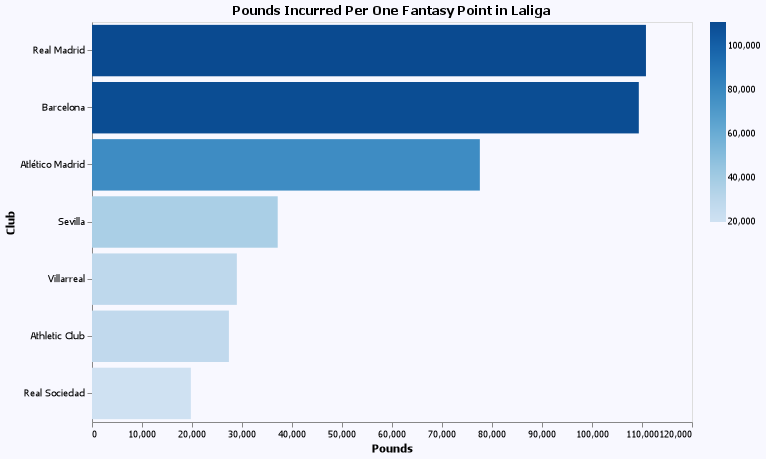

In [221]:
#plotting pounds per fantasy point data

Laliga_Final  |>
    @vlplot(width = 600, height = 400,
        title = "Pounds Incurred Per One Fantasy Point in Laliga",
        :bar,
        y = {:Clubs,sort = "-x" , title = "Club"},
        x = {:Pounds_Per_Fantacy_Point  , title = "Pounds"},
        color = :Pounds_Per_Fantacy_Point ,
        config = {background = "ghostwhite",legend={title = nothing},axis={grid=false}}
    )

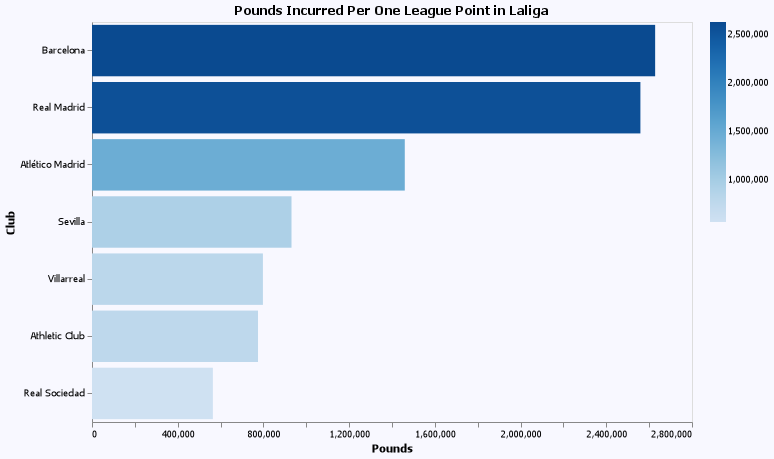

In [222]:
#plotting pounds per league point data
Laliga_Final  |>
    @vlplot(width = 600, height = 400,
        title = "Pounds Incurred Per One League Point in Laliga",
        :bar,
        y = {:Clubs,sort = "-x" , title = "Club"},
        x = {:Pounds_Per_League_Point  , title = "Pounds"},
        color = :Pounds_Per_League_Point,
        config = {background = "ghostwhite",legend={title = nothing},axis={grid=false}}
    )

In [223]:
#Mutate two more columns indicating the pounds per fantacy point and pounds per league points

PremierLeague_Final[!,:Pounds_Per_Fantacy_Point] = PremierLeague_Final[!,:Total_Wages]./PremierLeague_Final[!,:Total_Fantasy_Points]
PremierLeague_Final[!,:Pounds_Per_League_Point] = PremierLeague_Final[!,:Total_Wages]./PremierLeague_Final[!,:Total_league_Points]

7-element Vector{Float64}:
 2.4943270833333335e6
 1.669843853820598e6
 1.8721016016260162e6
 1.8828623655913977e6
 1.408411971830986e6
 1.3088951612903227e6
 1.1633960396039605e6

In [224]:
PremierLeague_Final

Row,Clubs,Total_league_Goals_For,Total_league_Goals_Against,Total_league_Points,Total_Fantasy_Points,Total_Wages,Pounds_Per_Fantacy_Point,Pounds_Per_League_Point
,String15,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,Manchester Utd,432,283,480,12068,1197277000,99210.9,2.49433e6
2,Manchester City,636,223,602,14249,1005246000,70548.5,1.66984e6
3,Chelsea,472,286,492,12248,921073988,75202.0,1.8721e6
4,Arsenal,461,317,465,12359,875531000,70841.6,1.88286e6
5,Liverpool,561,253,568,13482,799978000,59336.7,1.40841e6
6,Tottenham,494,268,496,12518,649212000,51862.3,1.3089e6
7,Leicester City,420,357,404,10901,470012000,43116.4,1.1634e6


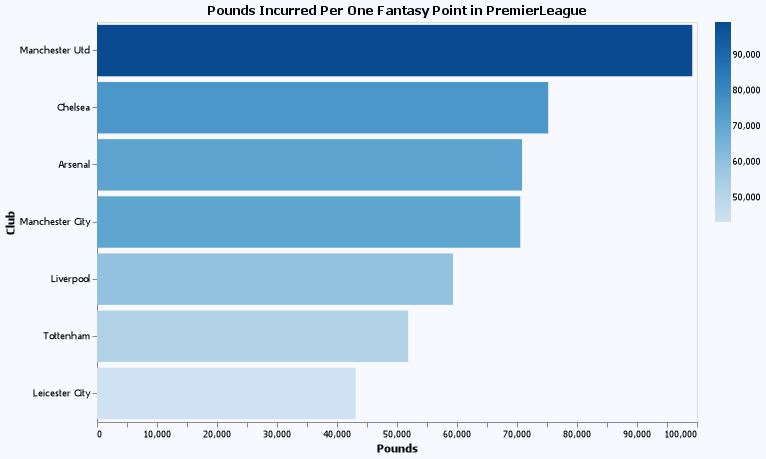

In [225]:
#plotting pounds per fantasy point data
PremierLeague_Final  |>
    @vlplot(width = 600, height = 400,
        title = "Pounds Incurred Per One Fantasy Point in PremierLeague",
        :bar,
        y = {:Clubs,sort = "-x" , title = "Club"},
        x = {:Pounds_Per_Fantacy_Point  , title = "Pounds"},
        color = :Pounds_Per_Fantacy_Point,
        config = {background = "ghostwhite",legend={title = nothing},axis={grid=false}}
    )

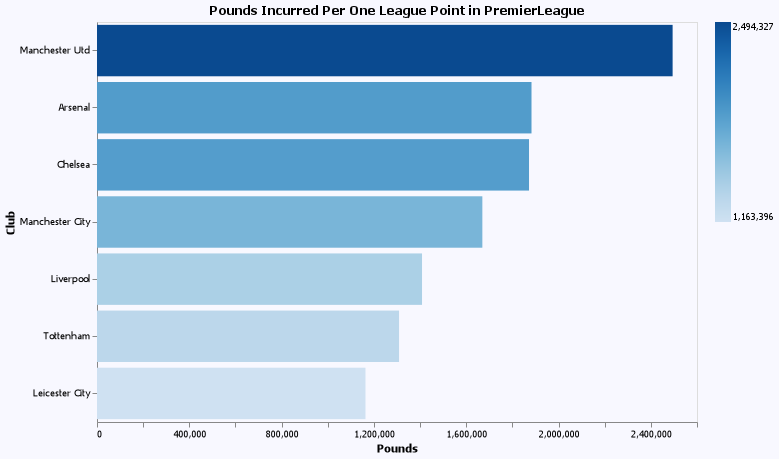

In [226]:
#plotting pounds per league point data
P_L_F = PremierLeague_Final  |>
    @vlplot(width = 600, height = 400,
        title = "Pounds Incurred Per One League Point in PremierLeague",
        :bar,
        y = {:Clubs,sort = "-x" , title = "Club"},
        x = {:Pounds_Per_League_Point  , title = "Pounds"},
        color = :Pounds_Per_League_Point,
        config = {background = "ghostwhite",legend={title = nothing},axis={grid=false}}
    )